<a href="https://colab.research.google.com/github/fianadew/Explanatory-Data-Analysis/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBMISSION 1 EXPERT CLASS MACHINE LEARNING**

# **NAMA : FIANA DEWI**



# **EMPLOYEE MENTAL HEALTH WHEN PANDEMIC**
## **Are Yours Employee Burnings Out?**

Memahami apa yang menjadi penyebab Burn Out bagi karyawan yang bekerja di suatu organisasi berdasarkan situasi pandemi saat ini yang mana bekerja dari rumah merupakan sebuah keuntungan ataupun kerugian. Tujuan pembuatan ini adalah untuk meningkatkan kesadaran tentang masalah kesehatan mental di seluruh dunia dan memobilisasi upaya untuk mendukung kesehatan mental. Menurut survei, sekitar 450 juta orang hidup dengan gangguan mental yang dapat menjadi salah satu penyebab utama kesehatan dan kecacatan yang buruk di seluruh dunia. Setiap hari ketika dunia menderita situasi pandemi, menjadi sangat sulit untuk menjaga kebugaran mental.



**Memahami Dataset** 

1.   Employee ID: ID unik milik setiap karyawan
2.   Date of Joining: tanggal karyawan bergabung dengan perusahaan (example: 2008-12-30)
3. Gender: Jenis kelamin karyawan (Male/Female)
4. Company Type: Jenis perusahaan tempat karyawan bekerja (Service/Product)
5. WFH Setup Available: Apakah perusahaan melakukan WFH? (Yes/No)
6. Designation: Kualifikasi keahlian yang harus ada ketika melakukan suatu pekerjaan dengan rentang nilai [0.0, 5.0] yang artinya semakin besar nilai semakin tinggi kualifikasi yang diperlukan
7. Resource Allocation: Jumlah waktu bekerja dalam rentang [1.0, 10.0] artinya semakin besar nilai semakin tinggi jumlah waktu bekerja
8. Mental Fatigue Score: Tingkat kelelahan mental yang dihadapi karyawan dalam rentang [0.0, 10.0] dimana nilai 0.0 berarti mental tidak lelah dan nilai 10.0 berarti mental sangat lelah
9. Burn Rate: Nilai yang perlu kita prediksi untuk setiap karyawan untuk mengetahui tingkat Burn out saat bekerja dalam rentang [0.0, 1.0] dimana semakin besar nilai akan semakin tinggi tingkat burn rate nya

**Apa yang akan dilakukan?**
Disini akan membuat prediksi regresi dengan targetnya adalah Burn Out berdasarkan predictor yang telah diberikan dengan menggunakan beberapa model machine learning yaitu KNN Regression, Linear Regression dan Deep Learning sekaligus mengecek model terbaik dengan tingkat akurasi yang tertinggi.


## **MEMBACA DATASET**
Dataset diperoleh dari Kaggle. Apabila Anda tertarik untuk melakukan penelitian iini juga dapat mengakses link berikut [dataset](https://www.kaggle.com/blurredmachine/are-your-employees-burning-out)

In [158]:
pip install matplotlib==3.4.2

In [159]:
!pip install --upgrade plotly

In [160]:
import pandas as pd #library untuk manipulasi data
import numpy as np #library untuk pengolahan angka
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt #library untuk visualisasi

from sklearn.preprocessing import OneHotEncoder #library untuk encode categorical data
from sklearn.decomposition import PCA #reduksi feature numerical
from sklearn.model_selection import train_test_split #membagi data train dan test
from sklearn.preprocessing import StandardScaler #scaling data

from google.colab import drive #membaca folder atau mengambil data dari google drive
import zipfile, os #unzip file
import datetime as dt #ubah format waktu dan tanggal

Memasukkan seluruh library yang diperlukan baik untuk pengolahan data, visualisasi data, pengolahan angka dan library machine learning

In [161]:
drive.mount('/content/gdrive') #memiinta izin autentifikasi google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Autentifikasi google drive

In [162]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle' #mengambil data dari folder kaggle

Path forlder yang akan digunakan untuk mengmabil atau membaca data dengan tujuan mendowload data langsung dari kagglenya

In [163]:
!kaggle datasets download -d blurredmachine/are-your-employees-burning-out #download data dari kaggle

are-your-employees-burning-out.zip: Skipping, found more recently modified local copy (use --force to force download)


Download data langsung dari kaggle (copy API command)

In [164]:
local_zip = '/content/are-your-employees-burning-out.zip' #path data yang telah didownload sebelumnya
ref_zip = zipfile.ZipFile(local_zip, 'r') #membaca file zip
ref_zip.extractall('/burn_out') #extract zip/ unzip file menjadi folder folder
ref_zip.close() #menutup koneksi

Unzip file dan menyimpan datanya di folder lain

In [165]:
train_dataset = pd.read_csv('/burn_out/train.csv') #membaca data train
test_dataset = pd.read_csv('/burn_out/test.csv') #membaca data test
train_dataset.head() #membaca 5 data pertama data train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


Membaca data test dan data train sebanyak 5 teratas

In [166]:
print(train_dataset.shape) #membaca bentuk (baris, kolom) data train 
print(test_dataset.shape) #membaca bentuk (baris, kolom) data test

(22750, 9)
(12250, 8)


Membaca bentuk (baris, kolom) data train dan data test

In [167]:
train_dataset.dtypes #membaca tipe data tiap kolom

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

Membaca tipe data tiap kolom dan ternyata date of joining memiliki tipe data object (string), karena kedepannya kita akan melakukan pengolahan data untuk mengetahui seberapa lama bekerja seorang karyawan di perusahaan, oleh karena itu tipe datanya harus diubah kedalam bentuk datetime

In [168]:
#Mengubah tipe data date menjadi date time
train_dataset['Date of Joining'] = pd.to_datetime(train_dataset['Date of Joining'])
test_dataset['Date of Joining'] = pd.to_datetime(test_dataset['Date of Joining'])

#Mengambil waktu hari ini 
train_dataset['today'] = dt.date.today()
test_dataset['today'] = dt.date.today()

#Mengubah tipe data today
train_dataset['today'] = pd.to_datetime(train_dataset['today'])
test_dataset['today'] = pd.to_datetime(test_dataset['today'])

#Mengurangi tanggal masuk kerja dengan tanggal hari ini untuk menentukan lama waktu bekerja
train_dataset['lama_bekerja'] = train_dataset['today'] - train_dataset['Date of Joining']
test_dataset['lama_bekerja'] = test_dataset['today'] - test_dataset['Date of Joining']

Proses diatas merupakan proses yang berfungsi untuk mencari sudah berapa lama kah seorang karyawan telah bekerja pada suatu perusahaan dengan asumsi bahwa lama bekerja dapat berkorelasi dalam mempengaruhi burn out. Lama bekerja diperoleh dari tanggal hari ini (dt.date.today()) dikurangi dengan tanggal karyawan masuk bekerja pada suatu perusahaan yang mana datanya telah tersedia didalam dataset. Hail pengurangan yang diperoleh akan berbentuk tipe data delta time, oleh karena itu pada proses selanjutnya kita perlu mengubah tipe datanya menjadi integer agar mudah dalam melakukan pengolahan data

In [169]:
train_dataset['lama_bekerja'] = (train_dataset['lama_bekerja']).dt.days #convert data mejadi integer days
test_dataset['lama_bekerja'] = (test_dataset['lama_bekerja']).dt.days #conver data menjadi integer days

Fungsi dt.days merupakan fungsi yang berguna untuk mengconvert tipe data delta time menjadi integer 

In [170]:
train_dataset = train_dataset.drop(columns=['Employee ID', 'Date of Joining', 'today']) #menghapus kolom yang tidak diperlukan pada data train
test_dataset = test_dataset.drop(columns=['Employee ID', 'Date of Joining', 'today']) #menghapus kolom yang tidak diperlukan pada data test

Tanggal masuk, tanggal hari ini dan ID karyawan sudah tidak diperlukan dalam pengolahan data karena sebelumnya kita telah mendapatkan lama seseorang bekerja. Karena kolom tersebut sudah tidak diperlukan, maka lebih baik kolom tersebut dihapus agar tidak mempengaruhi hasil akhir

In [171]:
print('Tipe data setiap kolom Train Dataset')
print(train_dataset.dtypes) #mengecek kembali tipe data tiap kolom
print('\nJumlah Missing Values Setiap Columns Train Dataset')
print(train_dataset.isnull().sum()) #mengecek kolom yang memiliki missing values

Tipe data setiap kolom Train Dataset
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
lama_bekerja              int64
dtype: object

Jumlah Missing Values Setiap Columns Train Dataset
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
lama_bekerja               0
dtype: int64


Tipe Data dan Missing Values Data Train


*   Tipe data terdiri dari categorical data (object) dan numerical data (float, int) 
*   Missing values terdapat di kolom resource allocation, mental fatihue score, dan burn rate dengan jumlah dalam rentang 1000 - 2000 missing values dari 22000 jumlah data yang ada, oleh karena jumlah missing values juga banyak, maka missing values tersebut akan diisi dengan median tiap kolom tersebut



In [172]:
print('Tipe data setiap kolom Test Dataset')
print(test_dataset.dtypes)
print('\nJumlah Missing Values Setiap Columns Test Dataset')
print(test_dataset.isnull().sum())

Tipe data setiap kolom Test Dataset
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
lama_bekerja              int64
dtype: object

Jumlah Missing Values Setiap Columns Test Dataset
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
lama_bekerja            0
dtype: int64


Tipe Data dan Missing Values Data Test


*   Tipe data terdiri dari categorical data (object) dan numerical data (float, int)
*   Tidak ada missing values



## **HANDLING MISSING VALUES**
Missing values akan diisi dengan nilai median

In [173]:
#mengisi missing values dengan median
train_dataset['Resource Allocation'] = train_dataset['Resource Allocation'].fillna(train_dataset['Resource Allocation'].median())
train_dataset['Mental Fatigue Score'] = train_dataset['Mental Fatigue Score'].fillna(train_dataset['Mental Fatigue Score'].median())
train_dataset['Burn Rate'] = train_dataset['Burn Rate'].fillna(train_dataset['Burn Rate'].median())

Kolom yang terdapat missing values dilakukan imputing dengan mengisinya dengan median

In [174]:
#mengecek missing values lagi
print('\nJumlah Missing Values Setiap Columns Train Dataset')
print(train_dataset.isnull().sum())


Jumlah Missing Values Setiap Columns Train Dataset
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
lama_bekerja            0
dtype: int64


Data train saat ini sudah tidak ada missing values lagi sehingga pengolahan data dapat dilanjutkan

In [175]:
#cek deskripsi data
train_dataset.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,lama_bekerja
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.452176,5.744176,0.451906,4900.605495
std,1.135145,1.987427,1.829962,0.193268,105.348190
min,0.000000,1.000000,0.000000,0.000000,4718.000000
25%,1.000000,3.000000,4.700000,0.320000,4810.000000
50%,2.000000,4.000000,5.900000,0.450000,4900.000000
75%,3.000000,6.000000,6.900000,0.580000,4992.000000
max,5.000000,10.000000,10.000000,1.000000,5083.000000


Berdasarkan deskripsi data diatas, dapat dilihat bahwa mental fatigue, burn rate dan designation mempunyai nilai minimal adalah 0 artinya bahwa terdapat karyawan yang tidak memiliki mental issue atau mentalnya terjaga bugar. Selain itu, nilai maksimum deskripsi data diatas juga telah sesuai dengan kriteria yang telah ditentukan sebelumnya yaitu max designation adalah 5, max mental fatigue adalah 10 dan max  burn out adalah 1

## **ANALISIS CATEGORICAL DATA**



In [176]:
import sys
sys.modules['matplotlib'].__version__

'3.4.2'

In [177]:
import plotly.express as px
def plot_pie(column):
    plot_data = train_dataset.groupby([column, 'Company Type', 'WFH Setup Available'])[column].agg({'count'}).reset_index()
    fig = px.sunburst(plot_data, path=[column, 'Company Type', 'WFH Setup Available'], values = 'count', 
                      title = 'Percentage of %s on Work'%column, width = 500, height = 500)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 25, title_x = 0.2, title_y =0.9)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [178]:
plot_pie('Gender')

In [179]:
def feature_count(feature): #membuat fungsi visualisai
  global_mean = train_dataset['Burn Rate'].mean()
  mean = train_dataset[train_dataset['Burn Rate']>global_mean]
  count_feature = mean.groupby(by=[feature])['Burn Rate'].count().reset_index() #group by rating user
  top_10 = count_feature[[feature, 'Burn Rate']].sort_values(by=['Burn Rate'], ascending=False).head(10) #menghitung jumlah values berdasarkan rating
  fig, ax=plt.subplots(figsize=(10,5)) #membuat size plot
  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()
  ax.grid(axis='y', alpha=0.3)
  vis = sns.barplot(x=feature, y="Burn Rate", data=top_10, palette="bright",  ec='k', lw=3, dodge=False) #visualisasi bar
  plt.bar_label(vis.containers[0], label_type='center', color='white', fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right") #membuat label
  ax.set_title('Count ' + feature + ' on Burn Rate',fontsize = 22, y=1.15) #membuat judul plot
  ax.set_xlabel(feature,fontsize = 20)  #membuat label x
  ax.set_ylabel('Burn Rate count', fontsize = 20) #membuat label y
  plt.text(s='Grafik jumlah burn rate yang berada diatas rata rata berdasarkan {}\nTernyata {} lebih banyak mengalami burn rate dibandingkan {}'.format(feature, count_feature.max().values[0], count_feature.min().values[0]), 
           fontsize=12, fontweight='bold', ha='left', x=xmin-0.47,y=count_feature.max().values[1] + 550)


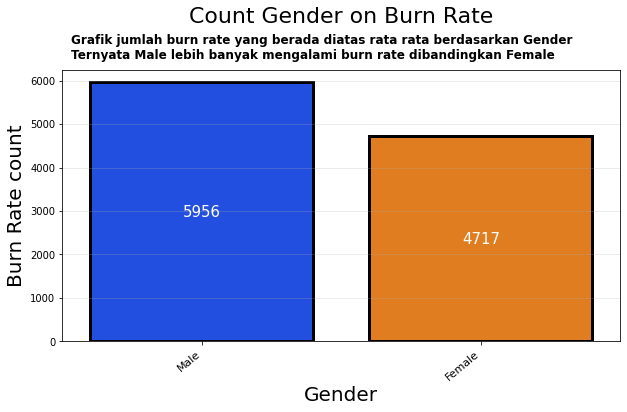

In [180]:
feature_count('Gender') #memanggil fungsi untuk visualisasi dengan parameter name

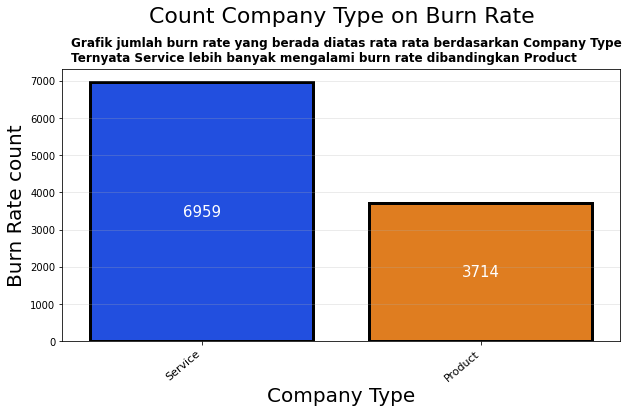

In [181]:
feature_count('Company Type') #memanggil fungsi untuk visualisasi dengan parameter name

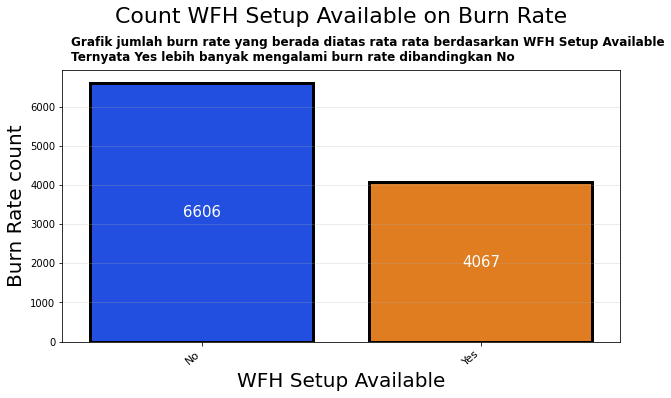

In [182]:
feature_count('WFH Setup Available') #memanggil fungsi untuk visualisasi dengan parameter name

In [183]:
def box_feature(hue):
  fig, ax= plt.subplots(1, 4, figsize=(15, 4))
  color = ['red', 'blue']
  global_mean = train_dataset['Burn Rate'].mean()
  sns.boxplot(x=train_dataset['Designation'], y=train_dataset['Burn Rate'], hue=train_dataset[hue], palette=color, ax=ax[0]).set(title='Designation and Burn Rate\nOn '+hue)
  sns.boxplot(x=train_dataset['Resource Allocation'], y=train_dataset['Burn Rate'], hue=train_dataset[hue], palette=color, ax=ax[1]).set(title='Resource Allocation and Burn Rate\nOn '+hue)
  sns.boxplot(x=train_dataset['Designation'], y=train_dataset['Resource Allocation'], hue=train_dataset[hue], palette=color, ax=ax[2]).set(title='Designation and Resource Allocation\nOn '+hue)
  line = ax[0].axhline(global_mean, linestyle='--', color='black')
  line = ax[1].axhline(global_mean, linestyle='--', color='black')
  ax[0].text(s='Garis rata rata', fontsize=8, fontweight='bold', ha='left', x=3,y=0.4)
  ax[1].text(s='Garis rata rata', fontsize=8, fontweight='bold', ha='left', x=5.5,y=0.4)


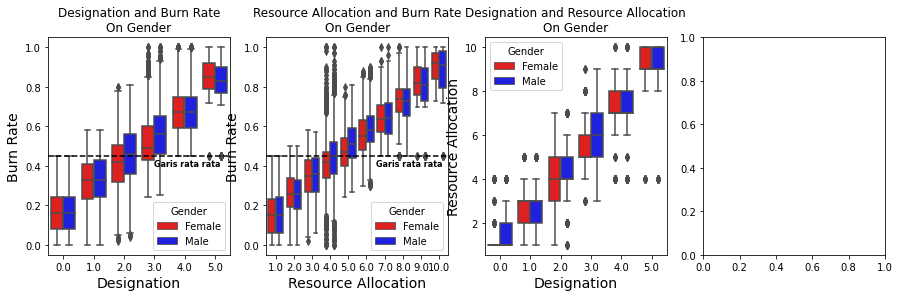

In [184]:
box_feature('Gender')

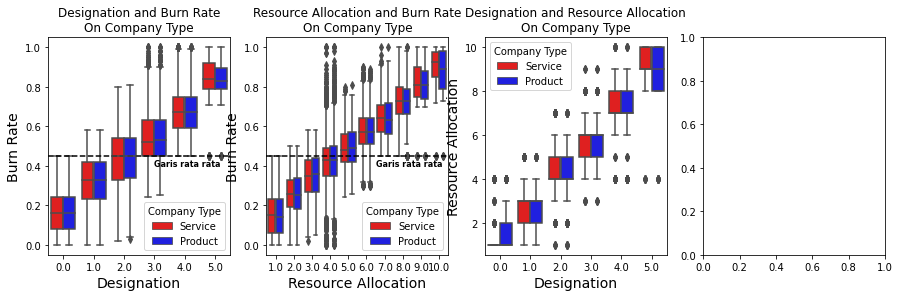

In [185]:
box_feature('Company Type')

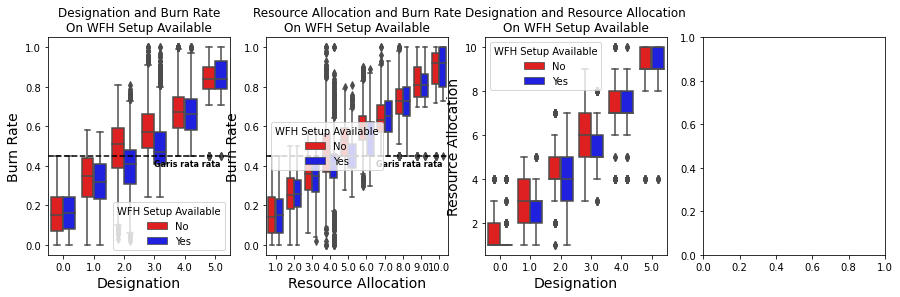

In [186]:
box_feature('WFH Setup Available')

In [187]:
train_dataset.groupby(by='Gender').count()

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,lama_bekerja
Gender,,,,,,,
Female,11908,11908,11908,11908,11908,11908,11908
Male,10842,10842,10842,10842,10842,10842,10842


In [188]:
train_dataset.groupby(by='Company Type').count()

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,lama_bekerja
Company Type,,,,,,,
Product,7917,7917,7917,7917,7917,7917,7917
Service,14833,14833,14833,14833,14833,14833,14833


In [189]:
train_dataset.groupby(by='WFH Setup Available').count()

,Gender,Company Type,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,lama_bekerja
WFH Setup Available,,,,,,,
No,10460,10460,10460,10460,10460,10460,10460
Yes,12290,12290,12290,12290,12290,12290,12290


In [190]:
train_dataset[train_dataset['WFH Setup Available'] =='No'].mean()

Designation                2.461377
Resource Allocation        5.046080
Mental Fatigue Score       6.266252
Burn Rate                  0.514459
lama_bekerja            4900.132314
dtype: float64

In [191]:
train_dataset[train_dataset['WFH Setup Available'] =='Yes'].mean()

Designation                1.938161
Resource Allocation        3.946705
Mental Fatigue Score       5.299837
Burn Rate                  0.398668
lama_bekerja            4901.008218
dtype: float64

## **ANALISIS NUMERICAL DATA**

In [192]:
def hist_plot(feature):
  sns.distplot(x=train_dataset[feature], kde=True, hist=False,
         bins = int(180/5), kde_kws = {'shade': True, 'linewidth': 2})

In [193]:
def outlier_remove(feature):
  Q1 = np.percentile(train_dataset[feature], 25, interpolation='midpoint')
  Q3 = np.percentile(train_dataset[feature], 75, interpolation='midpoint')
  IQR = Q3-Q1
  upper = np.where(train_dataset[feature] > (Q3+1.5*IQR))
  lower = np.where(train_dataset[feature] < (Q1-1.5*IQR))
  train_dataset.drop(upper[0], inplace = True)
  train_dataset.drop(lower[0], inplace = True)

In [194]:
outlier_remove('Burn Rate')
outlier_remove('Designation')
outlier_remove('Resource Allocation')
outlier_remove('lama_bekerja')

[Text(0.5, 1.0, 'lama_bekerja vs Burn Rate')]

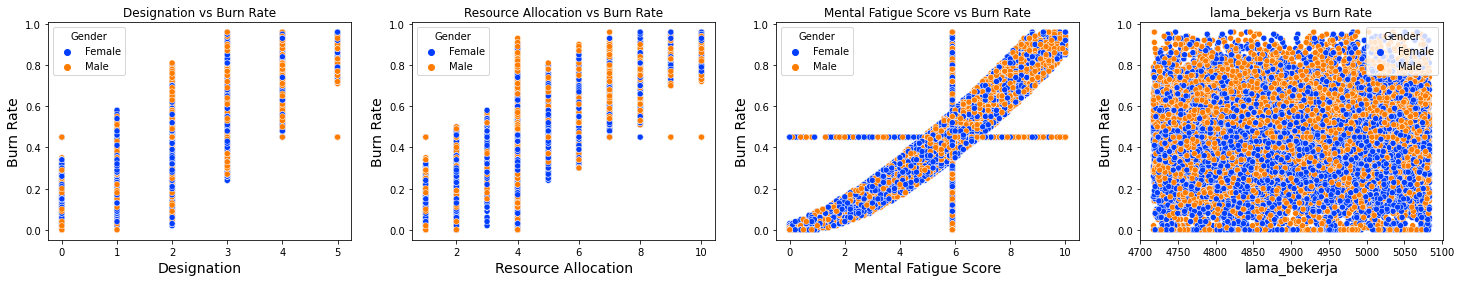

In [195]:
#membuat pairplot berdasarkan jenis kelamin
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,4))
plt.rcParams['axes.labelsize'] = 14

sns.scatterplot(x=train_dataset['Designation'], y=train_dataset['Burn Rate'], ax=ax[0], hue=train_dataset['Gender'], palette='bright').set(title='Designation vs Burn Rate')
sns.scatterplot(x=train_dataset['Resource Allocation'], y=train_dataset['Burn Rate'], ax=ax[1], hue=train_dataset['Gender'], palette='bright').set(title='Resource Allocation vs Burn Rate')
sns.scatterplot(x=train_dataset['Mental Fatigue Score'], y=train_dataset['Burn Rate'], ax=ax[2], hue=train_dataset['Gender'], palette='bright').set(title='Mental Fatigue Score vs Burn Rate')
sns.scatterplot(x=train_dataset['lama_bekerja'], y=train_dataset['Burn Rate'], ax=ax[3], hue=train_dataset['Gender'], palette='bright').set(title='lama_bekerja vs Burn Rate')

Berdasarkan pariplot diatas dapat disimpulkan bahwa :


*   Korelasi tertinggi yang mempengaruhi burn rate adalah mental fatigue dengan kemudian resource allocation dan terakhir designation
*   Lama bekerja tidak mempengaruhi terjadinya burn rate



## **CORRELATION HEATMAP**

<AxesSubplot:>

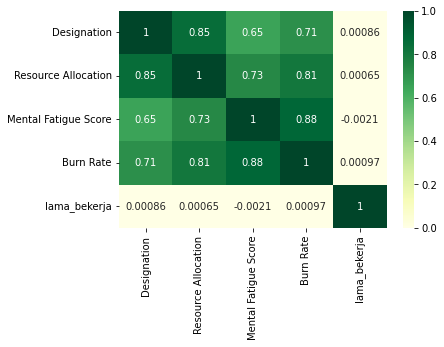

In [196]:
corr = train_dataset.corr()
sns.heatmap(corr, annot=True, cmap="YlGn")

Berdasarkan korelasi heatmap juga memperlihatkan hasil bahwa lama bekerja tidak mempengaruhi burn rate dan lainnya yang diindikasikan dengan nilai korelasi mendekati 0, sementara itu faktor lainnya memiliki pengaruh yang significant terhadap burn rate terutama mental fatigue yang memiliki nilai korelasi 0.88, kemudian resource allocation bernilai 0.81 dan terakhir designation sebesar 0.72. Oleh karena lama bekerja ternyata tidak mempengaruhi terjadinya burn rate, maka kedepannya kolom ini akan dihapus

In [197]:
#menghapus kolom lama bekerja
train_dataset = train_dataset.drop(columns='lama_bekerja')

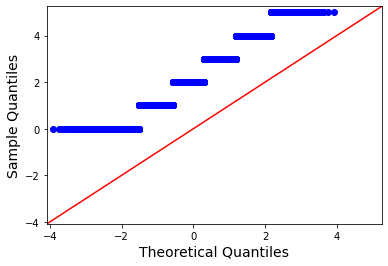

In [198]:
import statsmodels.api as sm
fig = sm.qqplot(train_dataset['Designation'], line='45')
plt.show()

Proses diatas merupakan proses menghapus kolom lama bekerja

## **ENCODING CATEGORICAL DATA**

In [199]:
#encoding data categorical menggunakan one hot encoder
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['Gender'], prefix='gender', drop_first=True)], axis=1)
train_dataset = pd.concat([train_dataset, pd.get_dummies(train_dataset['WFH Setup Available'], prefix='WFH', drop_first=True)], axis=1)
train_dataset = train_dataset.drop(columns=['Gender', 'Company Type', 'WFH Setup Available'])
train_dataset.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,gender_Male,WFH_Yes
0,2.0,3.0,3.8,0.16,0,0
1,1.0,2.0,5.0,0.36,1,1
2,2.0,4.0,5.8,0.49,0,1
3,1.0,1.0,2.6,0.20,1,1
4,3.0,7.0,6.9,0.52,0,0


Melakukan encoder data categorical yaitu gender, type company dan WFH or not menjadi variabel numeric dengan menggunakan fungsi pandas yaitu get_dummies

## **FEATURE REDUCTION**

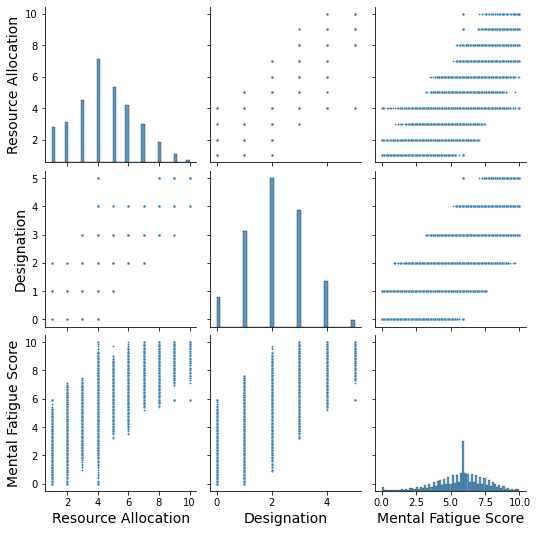

In [200]:
sns.pairplot(train_dataset[['Resource Allocation', 'Designation', 'Mental Fatigue Score']], plot_kws={'s':3})

In [201]:
pca = PCA(n_components=2, random_state=123)
pca.fit(train_dataset[['Resource Allocation', 'Designation']])
princ_comp= pca.transform(train_dataset[['Resource Allocation', 'Designation']])

In [202]:
pca.explained_variance_ratio_.round(3)

array([0.945, 0.055])

In [203]:
#featue reduksi menggunakan PCA karena bentuk data numerical
pca = PCA(n_components=1, random_state=123)
pca.fit(train_dataset[['Resource Allocation', 'Designation']])
train_dataset['Res_designation']= pca.transform(train_dataset.loc[:, ('Resource Allocation', 'Designation')]).flatten()
train_dataset = train_dataset.drop(columns=['Resource Allocation', 'Designation'])

In [204]:
train_dataset.head()

,Mental Fatigue Score,Burn Rate,gender_Male,WFH_Yes,Res_designation
0,3.8,0.16,0,0,-1.341545
1,5.0,0.36,1,1,-2.691808
2,5.8,0.49,0,1,-0.456181
3,2.6,0.20,1,1,-3.577171
4,6.9,0.52,0,0,2.664809


Melakukan fitur reduksi menggunakan PCA antara variabel metal fatigue dengan resource allocation menjadi satu fitur yaitu mentals faktor. Penggunaan PCA karena tipe datanya numerik 

### **Standardization**

In [205]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Res_designation', 'Mental Fatigue Score', 'Burn Rate'] #list numerical feture
scaler = StandardScaler() #memanggil fungsi standar scaler
scaler.fit(train_dataset[numerical_features]) #proses standar scaler
train_dataset[numerical_features] = scaler.transform(train_dataset.loc[:, numerical_features])
train_dataset.head()

,Mental Fatigue Score,Burn Rate,gender_Male,WFH_Yes,Res_designation
0,-1.061226,-1.524519,0,0,-0.610110
1,-0.399464,-0.468930,1,1,-1.224186
2,0.041710,0.217203,0,1,-0.207463
3,-1.722987,-1.313401,1,1,-1.626833
4,0.648325,0.375541,0,0,1.211907


In [206]:
#membaca data train terbaru
train_dataset.describe()

,Mental Fatigue Score,Burn Rate,gender_Male,WFH_Yes,Res_designation
count,2.262200e+04,2.262200e+04,22622.000000,22622.000000,2.262200e+04
mean,-2.400068e-16,1.464118e-16,0.476041,0.541729,7.754188e-17
std,1.000022e+00,1.000022e+00,0.499437,0.498267,1.000022e+00
min,-3.156804e+00,-2.368990e+00,0.000000,0.000000,-1.838261e+00
25%,-5.649048e-01,-6.800481e-01,0.000000,0.000000,-6.101104e-01
50%,9.685670e-02,6.084731e-03,0.000000,1.000000,3.964775e-03
75%,6.483246e-01,6.922175e-01,1.000000,1.000000,8.092594e-01
max,2.357875e+00,2.697836e+00,1.000000,1.000000,2.842704e+00


## **Train Test Split**

In [207]:
x=train_dataset.drop(columns='Burn Rate') #menghapus kolom target
y=train_dataset['Burn Rate'] #menyimpan kolom target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) #membagi data train dengan data test

In [208]:
x_train.head()

,Mental Fatigue Score,gender_Male,WFH_Yes,Res_designation
77,0.096857,0,1,-1.838261
2619,-1.061226,1,1,-1.838261
3441,-0.950932,0,1,-0.610110
14294,0.096857,1,0,0.809259
10301,-0.564905,0,1,-1.012758


In [209]:
y_train.head()

77      -2.157873
2619    -1.049504
3441    -0.574489
14294    0.639438
10301    0.006085
Name: Burn Rate, dtype: float64

# **MODELLING**

### **Base Model KNN REGRESI**

In [210]:
from sklearn.neighbors import KNeighborsRegressor #memanggil fungsi KNN regresi
from sklearn.metrics import mean_absolute_error #evaluasi matrics menggunakan mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)
base_test_predict = knn.predict(x_test)
base_train_predict = knn.predict(x_train)

In [211]:
def print_evaluation(actual, predict):
  R2 = r2_score(actual, predict)
  MAE = mean_absolute_error(actual, predict)
  MSE = mean_squared_error(actual, predict)
  RMSE = sqrt(mean_squared_error(actual, predict))
  print('Nilai R2    ; ', R2)
  print('Nilai MAE   ; ', MAE)
  print('Nilai MSE   ; ', MSE)
  print('Nilai RMSE  ; ', RMSE)

def evaluation(actual, predict):
  R2 = r2_score(actual, predict)
  MAE = mean_absolute_error(actual, predict)
  MSE = mean_squared_error(actual, predict)
  RMSE = sqrt(mean_squared_error(actual, predict))
  return R2, MAE, MSE, RMSE

In [212]:
print_evaluation(y_test, base_test_predict)
print('\n')
print_evaluation(y_train, base_train_predict)

Nilai R2    ;  0.8195871881920587
Nilai MAE   ;  0.3132591329742969
Nilai MSE   ;  0.17881729827806125
Nilai RMSE  ;  0.4228679442545406


Nilai R2    ;  0.8604666526465519
Nilai MAE   ;  0.2712409128976565
Nilai MSE   ;  0.13983967815196827
Nilai RMSE  ;  0.3739514382269017


In [213]:
result = pd.DataFrame(data=[['Base Model KNN', *evaluation(y_test, base_test_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868


### **GRIDCV KNN**

In [214]:
from sklearn.model_selection import GridSearchCV

parameters = { #membuat parameter untuk mencari nilai n_neighbor dan weight terbaik menggunakan gridsearchcv
    'n_neighbors' : range (1, 50),
    'weights' : ['uniform', 'distance']
}
KNN_gridsearch  = GridSearchCV(KNeighborsRegressor(), parameters) #memanggil gridsearchcv
KNN_gridsearch.fit(x_train, y_train) #fit model yang dibuat

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [215]:
best_k = KNN_gridsearch.best_params_['n_neighbors'] #membuat variabel n_neighbor terbaik berdasarkan gridsearch
best_weight = KNN_gridsearch.best_params_['weights'] #membuat variabel weight terbaik berdasarkan gridsearchcv

In [216]:
knn = KNeighborsRegressor(n_neighbors = best_k, weights=best_weight)
knn.fit(x_train, y_train)
gridcv_test_predict = knn.predict(x_test)
gridcv_train_predict = knn.predict(x_train)

In [217]:
print_evaluation(y_test, gridcv_test_predict)
print('\n')
print_evaluation(y_train, gridcv_train_predict)

Nilai R2    ;  0.8526248429345619
Nilai MAE   ;  0.2860213425355154
Nilai MSE   ;  0.14607181804694072
Nilai RMSE  ;  0.38219343014622936


Nilai R2    ;  0.8608430439000595
Nilai MAE   ;  0.27509381924849685
Nilai MSE   ;  0.139462460571024
Nilai RMSE  ;  0.3734467305667891


In [218]:
result2 = pd.DataFrame([['Grid CV KNN', *evaluation(y_test, gridcv_test_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result2, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193


### **BEGGING KNN REGRESION**

In [219]:
from sklearn.ensemble import BaggingRegressor #menggunakan model ensambel bagging regressor

bagged_k = KNeighborsRegressor( #memanggil model knn regresi mengggunakan n_neighbor dan wight terbaik
    n_neighbors=best_k, weights=best_weight
)

bagging_model = BaggingRegressor(bagged_k, n_estimators=100) #memanggil bagging regressor kedalam model regresi knn
bagging_model.fit(x_train, y_train) #fit model
bag_test_predict = bagging_model.predict(x_test) #memprediksi x_test
bag_train_predict = bagging_model.predict(x_train)

In [220]:
print_evaluation(y_test, bag_test_predict)
print('\n')
print_evaluation(y_train, bag_train_predict)

Nilai R2    ;  0.8542381293981038
Nilai MAE   ;  0.28551834372476814
Nilai MSE   ;  0.1444727989757993
Nilai RMSE  ;  0.38009577605624517


Nilai R2    ;  0.8618845036559908
Nilai MAE   ;  0.27444284625858933
Nilai MSE   ;  0.13841871439966072
Nilai RMSE  ;  0.37204665621351946


In [221]:
result3 = pd.DataFrame([['Bagging KNN', *evaluation(y_test, bag_test_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result3, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193
2,Bagging KNN,0.854238,0.285518,0.144473,0.380096


# **REGRESI LINEAR**

### **Multiple REGRESI**

In [222]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train, y_train)
linear_predict = linear_model.predict(x_test)
print_evaluation(y_test, linear_predict)

Nilai R2    ;  0.8321073906175891
Nilai MAE   ;  0.3013120120036833
Nilai MSE   ;  0.16640782054090847
Nilai RMSE  ;  0.4079311468139059


In [223]:
result4 = pd.DataFrame([['Multiple Regresi', *evaluation(y_test, linear_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result4, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193
2,Bagging KNN,0.854238,0.285518,0.144473,0.380096
3,Multiple Regresi,0.832107,0.301312,0.166408,0.407931


In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['variabel'] = x_train.columns
vif[vif.VIF > 5]

,VIF,variabel


### **Polynomial Regresi**

In [225]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

lin_poly = LinearRegression()
lin_poly.fit(X_poly, y_train)
poly_predict = lin_poly.predict(X_test_poly)
print_evaluation(y_test, poly_predict)

Nilai R2    ;  0.8433739226920635
Nilai MAE   ;  0.29476392245131317
Nilai MSE   ;  0.15524092609293916
Nilai RMSE  ;  0.3940062513373857


In [226]:
result5 = pd.DataFrame([['Polynomial Regresi', *evaluation(y_test, poly_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result5, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193
2,Bagging KNN,0.854238,0.285518,0.144473,0.380096
3,Multiple Regresi,0.832107,0.301312,0.166408,0.407931
4,Polynomial Regresi,0.843374,0.294764,0.155241,0.394006


# **SVR**

In [227]:
#from sklearn.svm import SVR

#svr = SVR(kernel='rbf')
#svr.fit(x_train,y_train)
#svr_predict = svr.predict(x_test)
#print_evaluation(y_test, svr_predict)

In [228]:
#result6 = pd.DataFrame([['SVR', *evaluation(y_test, linear_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
#result =  result.append(result6, ignore_index=True)
#result

# **Random Forest**

In [229]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
RF_predict = RF.predict(x_test)
print_evaluation(y_test, RF_predict)

Nilai R2    ;  0.8415306750530476
Nilai MAE   ;  0.29205295332184894
Nilai MSE   ;  0.15706787263605446
Nilai RMSE  ;  0.3963178934088826


In [230]:
result7 = pd.DataFrame([['Random Forest', *evaluation(y_test, RF_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result7, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193
2,Bagging KNN,0.854238,0.285518,0.144473,0.380096
3,Multiple Regresi,0.832107,0.301312,0.166408,0.407931
4,Polynomial Regresi,0.843374,0.294764,0.155241,0.394006
5,Random Forest,0.841531,0.292053,0.157068,0.396318


### **AdaBoostRegressor**

In [231]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(x_train, y_train)
boosting_predict = boosting.predict(x_test)
print_evaluation(y_test, boosting_predict)

Nilai R2    ;  0.8162520896522734
Nilai MAE   ;  0.32494411854950056
Nilai MSE   ;  0.1821229022670417
Nilai RMSE  ;  0.42675859952324535


In [232]:
result8 = pd.DataFrame([['Boosting', *evaluation(y_test, boosting_predict)]], columns=['Model', 'R2', 'MAE', 'MSE', 'RMSE'])
result =  result.append(result8, ignore_index=True)
result

,Model,R2,MAE,MSE,RMSE
0,Base Model KNN,0.819587,0.313259,0.178817,0.422868
1,Grid CV KNN,0.852625,0.286021,0.146072,0.382193
2,Bagging KNN,0.854238,0.285518,0.144473,0.380096
3,Multiple Regresi,0.832107,0.301312,0.166408,0.407931
4,Polynomial Regresi,0.843374,0.294764,0.155241,0.394006
5,Random Forest,0.841531,0.292053,0.157068,0.396318
6,Boosting,0.816252,0.324944,0.182123,0.426759


## **EVALUASI**

In [233]:
result.set_index('Model', inplace=True)

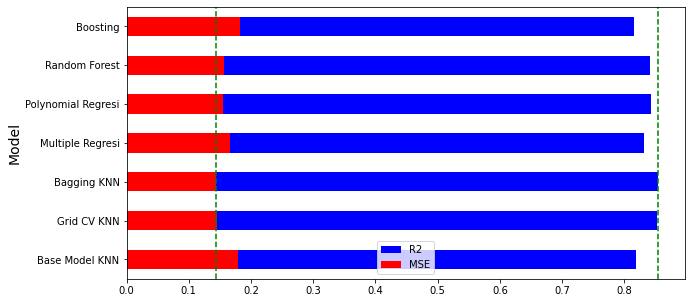

In [238]:
fig, ax = plt.subplots(figsize=(10,5))
result['R2'].plot(kind='barh', color='blue', label='R2')
result['MSE'].plot(kind='barh', color='red', label='MSE')
line1 = ax.axvline(result['R2'].max(), linestyle='--', color='green')
line2 = ax.axvline(result['MSE'].min(), linestyle='--', color='green')
plt.legend()

- Nilai MAE untuk model KNN regresi tanpa gridsearch adalah 0,1485
- Nilai MAE model KNN yang menggunakan GridsearchCV dan Bagging ensamle adalah 0.1450. 

Dapat dilihat bahwa model KNN regresi yang menggunakan gridsearchcv dan bagging ensamble memiliki nilai error yang lebih kecil dari knn biasai, walaupun perbedaannya sangat kecil.